# Joint Kinematics

In [2]:
class Joint:
    def __init__(self, x, y, centroid=None, end=None, **kwargs):
        self.x = x
        self.y = y
        self.centroid = centroid
        self.end = end
        self.other_info = kwargs

    def transform(self, transformation_matrix):
        """Apply a transformation matrix to the joint's position."""
        new_x = transformation_matrix[0][0] * self.x + transformation_matrix[0][1] * self.y
        new_y = transformation_matrix[1][0] * self.x + transformation_matrix[1][1] * self.y
        self.x = new_x
        self.y = new_y

    def inherit_transformation(self, other):
        """Inherit transformation from another joint."""
        self.x = other.x
        self.y = other.y
        self.centroid = other.centroid
        self.end = other.end
        self.other_info = other.other_info

    def __repr__(self):
        return f"Joint(x={self.x}, y={self.y}, centroid={self.centroid}, end={self.end}, other_info={self.other_info})"


# Example usage:
joint1 = Joint(2, 3, centroid=(0, 0), end=(4, 5), color="red")
joint2 = Joint(5, 6, centroid=(1, 1), end=(7, 8), shape="circle")

# Define a transformation matrix
transformation_matrix = [[0.5, 0], [0, 0.5]]

# Transform joint1
joint1.transform(transformation_matrix)

# Inherit transformation from joint1 to joint3
joint3 = Joint(0, 0)
joint3.inherit_transformation(joint1)

print("Transformed joint1:", joint1)
print("Inherited joint3:", joint3)


Transformed joint1: Joint(x=1.0, y=1.5, centroid=(0, 0), end=(4, 5), other_info={'color': 'red'})
Inherited joint3: Joint(x=1.0, y=1.5, centroid=(0, 0), end=(4, 5), other_info={'color': 'red'})


In [3]:
class Joint:
    def __init__(self, x, y, centroid=None, end=None, **kwargs):
        self.x = x
        self.y = y
        self.centroid = centroid
        self.end = end
        self.other_info = kwargs

    def transform(self, transformation_matrix):
        """Apply a transformation matrix to the joint's position."""
        new_x = transformation_matrix[0][0] * self.x + transformation_matrix[0][1] * self.y
        new_y = transformation_matrix[1][0] * self.x + transformation_matrix[1][1] * self.y
        self.x = new_x
        self.y = new_y
        if self.end:
            # Apply transformation to end point
            self.end = (transformation_matrix[0][0] * self.end[0] + transformation_matrix[0][1] * self.end[1],
                        transformation_matrix[1][0] * self.end[0] + transformation_matrix[1][1] * self.end[1])

    def inherit_transformation(self, other):
        """Inherit transformation from another joint."""
        self.x = other.x
        self.y = other.y
        self.centroid = other.centroid
        self.end = other.end
        self.other_info = other.other_info

    def connect_to(self, other):
        """Connect this joint to another joint."""
        if self.end:
            other.inherit_transformation(self)

    def __repr__(self):
        return f"Joint(x={self.x}, y={self.y}, centroid={self.centroid}, end={self.end}, other_info={self.other_info})"


# Example usage:
joint1 = Joint(2, 3, centroid=(0, 0), end=(4, 5), color="red")
joint2 = Joint(5, 6, centroid=(1, 1), end=(7, 8), shape="circle")

# Define a transformation matrix
transformation_matrix = [[0.5, 0], [0, 0.5]]

# Transform joint1
joint1.transform(transformation_matrix)

# Connect joint2 to joint1
joint2.connect_to(joint1)

print("Transformed joint1:", joint1)
print("Connected joint2:", joint2)


Transformed joint1: Joint(x=5, y=6, centroid=(1, 1), end=(7, 8), other_info={'shape': 'circle'})
Connected joint2: Joint(x=5, y=6, centroid=(1, 1), end=(7, 8), other_info={'shape': 'circle'})


In [4]:
class Joint:
    def __init__(self, x, y, centroid=None, end=None, **kwargs):
        self.x = x
        self.y = y
        self.centroid = centroid
        self.end = end
        self.other_info = kwargs

    def move(self, delta_x, delta_y):
        """Move the joint by the specified deltas."""
        self.x += delta_x
        self.y += delta_y
        if self.end:
            self.end = (self.end[0] + delta_x, self.end[1] + delta_y)

    def inherit_movement(self, other):
        """Inherit movement from another joint."""
        self.x = other.x
        self.y = other.y
        self.centroid = other.centroid
        self.end = other.end
        self.other_info = other.other_info

    def connect_to(self, other):
        """Connect this joint to another joint."""
        if self.end:
            other.inherit_movement(self)

    def __repr__(self):
        return f"Joint(x={self.x}, y={self.y}, centroid={self.centroid}, end={self.end}, other_info={self.other_info})"


# Example usage:
joint1 = Joint(2, 3, centroid=(0, 0), end=(4, 5), color="red")
joint2 = Joint(5, 6, centroid=(1, 1), end=(7, 8), shape="circle")

# Move joint1
joint1.move(1, 2)

# Connect joint2 to joint1
joint2.connect_to(joint1)

print("Moved joint1:", joint1)
print("Connected joint2:", joint2)


Moved joint1: Joint(x=5, y=6, centroid=(1, 1), end=(7, 8), other_info={'shape': 'circle'})
Connected joint2: Joint(x=5, y=6, centroid=(1, 1), end=(7, 8), other_info={'shape': 'circle'})


In [5]:
import math
import time

class Joint:
    def __init__(self, x, y, length=0, angle=0, **kwargs):
        self.x = x
        self.y = y
        self.length = length
        self.angle = angle
        self.other_info = kwargs

    def calculate_end(self):
        """Calculate the end point based on length and angle."""
        end_x = self.x + self.length * math.cos(self.angle)
        end_y = self.y + self.length * math.sin(self.angle)
        return end_x, end_y

    def move(self, delta_x, delta_y):
        """Move the joint by the specified deltas."""
        self.x += delta_x
        self.y += delta_y

    def update_angle(self, new_angle):
        """Update the joint angle."""
        self.angle = new_angle

    def inherit_movement(self, other):
        """Inherit movement from another joint."""
        self.x = other.x
        self.y = other.y
        self.angle = other.angle
        self.length = other.length
        self.other_info = other.other_info

    def connect_to(self, other):
        """Connect this joint to another joint."""
        end_x, end_y = self.calculate_end()
        other.x = end_x
        other.y = end_y
        other.inherit_movement(self)

    def __repr__(self):
        return f"Joint(x={self.x}, y={self.y}, length={self.length}, angle={self.angle}, other_info={self.other_info})"


# Example usage:
joint1 = Joint(0, 0, length=5, angle=math.pi/4)
joint2 = Joint(0, 0, length=3, angle=math.pi/6)

# Move joint1
joint1.move(1, 2)

# Connect joint2 to joint1
joint2.connect_to(joint1)

print("Moved joint1:", joint1)
print("Connected joint2:", joint2)


Moved joint1: Joint(x=0, y=0, length=3, angle=0.5235987755982988, other_info={})
Connected joint2: Joint(x=0, y=0, length=3, angle=0.5235987755982988, other_info={})


In [6]:
import math

class Joint:
    def __init__(self, length=0, angle=0, part=None, parent=None, **kwargs):
        self.length = length
        self.angle = angle
        self.part = part
        self.parent = parent
        self.other_info = kwargs

    def calculate_end(self):
        """Calculate the end point based on length and angle."""
        end_x = self.length * math.cos(self.angle)
        end_y = self.length * math.sin(self.angle)
        return end_x, end_y

    def move(self, delta_angle):
        """Move the joint by the specified angle."""
        self.angle += delta_angle

    def update_part_position(self):
        """Update the position of the connected part."""
        if self.part:
            end_x, end_y = self.calculate_end()
            self.part.update_position(end_x, end_y)

    def connect_to(self, part):
        """Connect this joint to a part."""
        self.part = part

    def connect_child(self, child_joint):
        """Connect a child joint."""
        child_joint.parent = self

    def __repr__(self):
        return f"Joint(length={self.length}, angle={self.angle}, part={self.part}, parent={self.parent}, other_info={self.other_info})"


class Part:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def update_position(self, x, y):
        """Update the position of the part."""
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Part(x={self.x}, y={self.y})"


# Example usage:
part1 = Part(x=2, y=2)
joint1 = Joint(length=5, angle=math.pi/4)
joint2 = Joint(length=3, angle=math.pi/6)

# Connect joint1 to part1
joint1.connect_to(part1)

# Connect joint2 to joint1
joint1.connect_child(joint2)

# Move joint1
joint1.move(math.pi/6)
joint1.update_part_position()

print("Moved joint1:", joint1)
print("Updated part1:", part1)


Moved joint1: Joint(length=5, angle=1.308996938995747, part=Part(x=1.2940952255126048, y=4.829629131445341), parent=None, other_info={})
Updated part1: Part(x=1.2940952255126048, y=4.829629131445341)


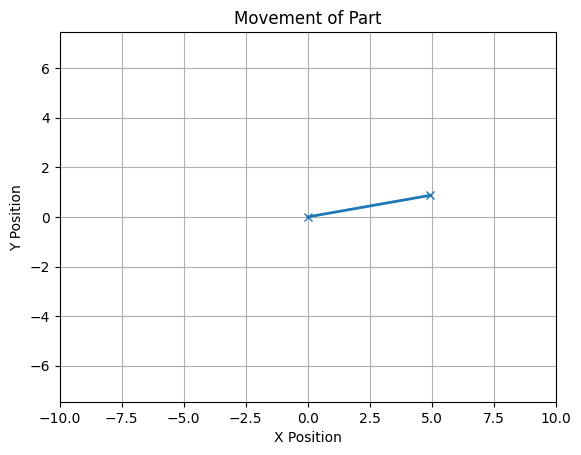

In [7]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

class Joint:
    def __init__(self, length=0, angle=0, parent=None, **kwargs):
        self.length = length
        self.angle = angle
        self.parent = parent
        self.child = None
        self.other_info = kwargs

    def calculate_end(self):
        """Calculate the end point based on length and angle."""
        end_x = self.length * math.cos(self.angle)
        end_y = self.length * math.sin(self.angle)
        return end_x, end_y

    def connect_child(self, child_joint):
        """Connect a child joint."""
        self.child = child_joint
        child_joint.parent = self

    def __repr__(self):
        return f"Joint(angle={self.angle}, parent={self.parent}, child={self.child}, other_info={self.other_info})"


class Part:
    def __init__(self, start=(0, 0), length=0, angle=0):
        self.start = start
        self.length = length
        self.angle = angle
        self.end = self.calculate_end()

    def calculate_end(self):
        """Calculate the end point based on start, length, and angle."""
        end_x = self.start[0] + self.length * math.cos(self.angle)
        end_y = self.start[1] + self.length * math.sin(self.angle)
        return end_x, end_y

    def update_position(self, start, angle):
        """Update the position and angle of the part."""
        self.start = start
        self.angle = angle
        self.end = self.calculate_end()

    def __repr__(self):
        return f"Part(start={self.start}, end={self.end})"


# Recursively update part positions
def update_part_positions(joint, delta_angle):
    if joint:
        if isinstance(joint.child, Joint):  # Check if the child is a joint
            joint.child.x, joint.child.y = joint.calculate_end()
            update_part_positions(joint.child, delta_angle)


# Initialize part and joint
part1 = Part(start=(0, 0), length=5, angle=math.pi/4)
joint1 = Joint(length=0, angle=0)

# Connect joint1 to part1
joint1.connect_child(part1)

# Define movement increments
delta_angle = math.pi / 36  # 5 degrees

# Initialize figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Initialize line for the part
line, = ax.plot([], [], 'x-', lw=2)

# Function to update the animation
def update(frame):
    # Move the joint
    joint1.angle += delta_angle
    part1.update_position(start=(0, 0), angle=joint1.angle)
    # Update the line data
    line.set_data([part1.start[0], part1.end[0]], [part1.start[1], part1.end[1]])
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=range(3), interval=50, blit=True)

# Show the animation
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Movement of Part')
plt.grid(True)
plt.axis('equal')
plt.show()
